<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# **Hands-on practice lab: Model Development**

Estimated time needed: **45** minutes

In this lab, you will use the skills acquired in throughout the module, and use linear regression principles to create a model that predicts the Price of the laptop, based on one or more attributes of the dataset.


# Objectives

After completing this lab you will be able to:

 - Use Linear Regression in one variable to fit the parameters to a model
 - Use Linear Regression in multiple variables to fit the parameters to a model
 - Use Polynomial Regression in single variable tofit the parameters to a model
 - Create a pipeline for performing linear regression using multiple features in polynomial scaling
 - Evaluate the performance of different forms of regression on basis of MSE and R^2 parameters


# Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:


In [ ]:
#import piplite
#await piplite.install('seaborn')

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

### Importing the dataset
Run the cell below to download the dataset into this environment.

This function will download the dataset into your browser


In [ ]:
#This function will download the dataset into your browser 

#from pyodide.http import pyfetch

#async def download(url, filename):
#    response = await pyfetch(url)
#    if response.status == 200:
#        with open(filename, "wb") as f:
#            f.write(await response.bytes())

We put the file path along with a quotation mark so that pandas will read the file into a dataframe from that address. The file path can be either an URL or your local file address.


In [ ]:
#path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

You will need to download the dataset using the download() function:


In [2]:
#you will need to download the dataset;
#await download(path, "laptops.csv")
file_name="laptops_CLEANED_NO_INDEX.csv"

Load the dataset into a pandas dataframe


In [3]:
df = pd.read_csv(file_name, header=0)

>Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply skip the steps above, and simply use the URL directly in the pandas.read_csv() function. You can uncomment and run the statements in the cell below.


In [ ]:
#https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
#df = pd.read_csv(filepath, header=None)

In [4]:
# show the first 5 rows using dataframe.head() method
print("The first 5 rows of the dataframe") 
df.head(5)

The first 5 rows of the dataframe


,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Weight_pound,Screen_Size_inch,CPU_frequency_norm,Price_binned,Screen-Full_HD,Screen-IPS_Panel
0,Acer,4,2,1,5,35.56,1.6,8,256,1.60,978,3.53,14.0,0.551724,Low,False,True
1,Dell,3,1,1,3,39.62,2.0,4,256,2.20,634,4.85,15.6,0.689655,Low,True,False
2,Dell,3,1,1,7,39.62,2.7,8,256,2.20,946,4.85,15.6,0.931034,Low,True,False
3,Dell,4,2,1,5,33.78,1.6,8,128,1.22,1244,2.69,13.3,0.551724,Low,False,True
4,HP,4,2,1,7,39.62,1.8,8,256,1.91,837,4.21,15.6,0.620690,Low,True,False


# Task 1 : Single Linear Regression

You have learnt that "CPU_frequency" is the parameter with the lowest p-value among the different features of the dataset. Create a single feature Linear Regression model that fits the pair of "CPU_frequency" and "Price" to find the model for prediction.


In [40]:
#Previuosly we identified that "CPU_frequency" is one parameter that can be used to predict the price of a laptop
#We create a linear regression model using the "CPU_frequency" feature

# create a linear regression object
lm_cpu_freq = LinearRegression()
X = df[['CPU_frequency']]
Y = df['Price']
lm_cpu_freq.fit(X,Y)
Yhat_CPUfreq_price=lm_cpu_freq.predict(X)

<details>
    <summary>Click here for Solution</summary>

```python
lm = LinearRegression()

X = df[['CPU_frequency']]
Y = df['Price']

lm.fit(X,Y)

Yhat=lm.predict(X)
```

</details>


Generate the Distribution plot for the predicted values and that of the actual values. How well did the model perform?


/Users/pedro_rgz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pedro_rgz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


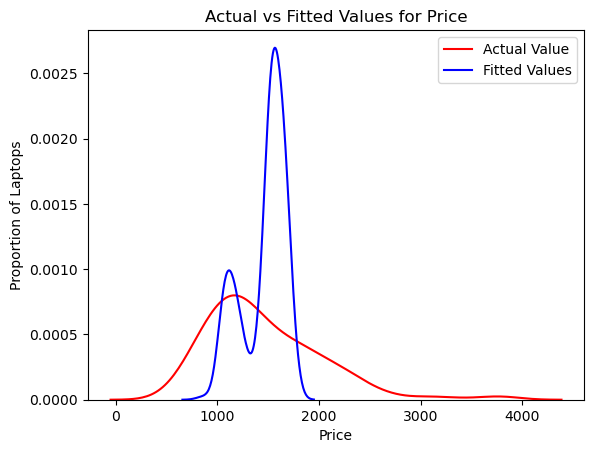

In [41]:
#Generate the distribution plot for the CPU_frequency and Price, using the predicted value as well
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat_CPUfreq_price, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Laptops')
plt.legend(['Actual Value','Fitted Values'])
plt.show()

<details>
    <summary>Click here for Solution</summary>

```python
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")

# Create a distribution plot for predicted values
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()
```

</details>


Evaluate the Mean Squared Error and R^2 score values for the model. 


In [43]:
#Based on the plot above, we can see that the fitted values are not even close to the actual values
#To confirm this, we can calculate the R^2 value for the CPU_frequency and Price
r_score_lm_cpu_freq = lm_cpu_freq.score(X, Y)
mse_lm_cpu_freq = mean_squared_error(df['Price'], Yhat_CPUfreq_price)

print('The R-square for the current LM is: ', r_score_lm_cpu_freq)
print('The MSE for the current LM is: ', mse_lm_cpu_freq)

The R-square for the current LM is:  0.1344436321024326
The MSE for the current LM is:  284583.4405868629


<details>
    <summary>Click here for Solution</summary>

```python
mse_slr = mean_squared_error(df['Price'], Yhat)
r2_score_slr = lm.score(X, Y)
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)
```

</details>


/Users/pedro_rgz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pedro_rgz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


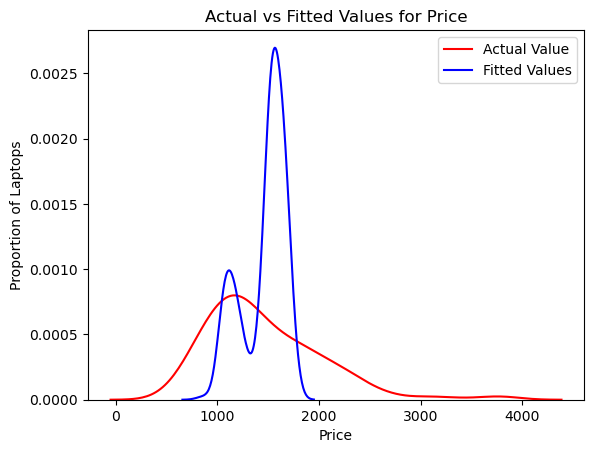

The R-square for the current LM is:  0.1344436321024326
The MSE for the current LM is:  284583.4405868629


In [44]:
#Just for exercise, we will do the same but using the "CPU_frequency_norm" feature
# create a linear regression object
lm_cpu_freq_norm = LinearRegression()
X = df[['CPU_frequency_norm']]
Y = df['Price']
lm_cpu_freq_norm.fit(X,Y)
Yhat_CPUfreq_norm_price=lm_cpu_freq_norm.predict(X)

#Generate the distribution plot for the CPU_frequency_norm and Price, using the predicted value as well
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat_CPUfreq_norm_price, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Laptops')
plt.legend(['Actual Value','Fitted Values'])
plt.show()

#Print the R^2 value for the CPU_frequency_norm and Price
print('The R-square for the current LM is: ', lm_cpu_freq_norm.score(X, Y))
print('The MSE for the current LM is: ', mean_squared_error(df['Price'], Yhat_CPUfreq_norm_price))

In [45]:
#Write the linear function for the CPU_frequency_norm and Price
print('The linear function for the current LM is: ', 'Price = ', lm_cpu_freq_norm.coef_[0], '* CPU_frequency_norm + ', lm_cpu_freq_norm.intercept_)

The linear function for the current LM is:  Price =  1485.1936264779192 * CPU_frequency_norm +  253.6611706858198


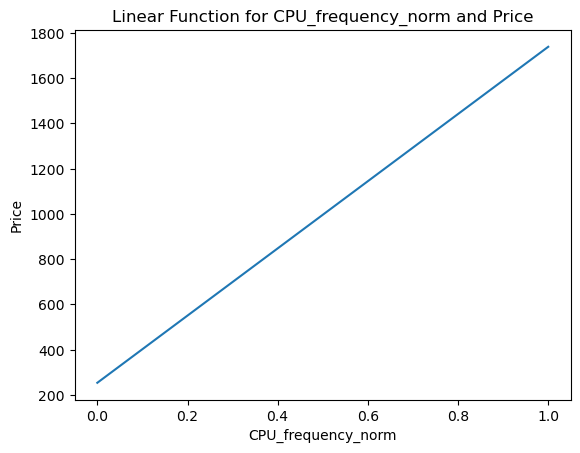

In [46]:
x_for_model = np.linspace(0, 1, 1000)
y_from_model = lm_cpu_freq_norm.predict(x_for_model.reshape(-1, 1))

#Plot the linear function for the CPU_frequency_norm and Price
ax=plt.plot(x_for_model, y_from_model)
plt.title('Linear Function for CPU_frequency_norm and Price')
plt.xlabel('CPU_frequency_norm')
plt.ylabel('Price')
plt.show()

# Task 2 - Multiple Linear Regression
The parameters which have a low enough p-value so as to indicate strong relationship with the 'Price' value are 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'. Use all these variables to create a Multiple Linear Regression system. 


In [47]:
#Previously we also identified that 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category' work as well as 'CPU_frequency' to predict the price of a laptop
#We will create a multiple linear regression model using these features

# create a linear regression object
mlm = LinearRegression()
Z = df[['RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']]
mlm.fit(Z, df['Price'])
Yhat_mlm_price=mlm.predict(Z)

<details>
    <summary>Click here for Solution</summary>

```python
lm1 = LinearRegression()
Z = df[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']]
lm1.fit(Z,Y)
Y_hat = lm1.predict(Z)
```

</details>


Plot the Distribution graph of the predicted values as well as the Actual values


/Users/pedro_rgz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pedro_rgz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


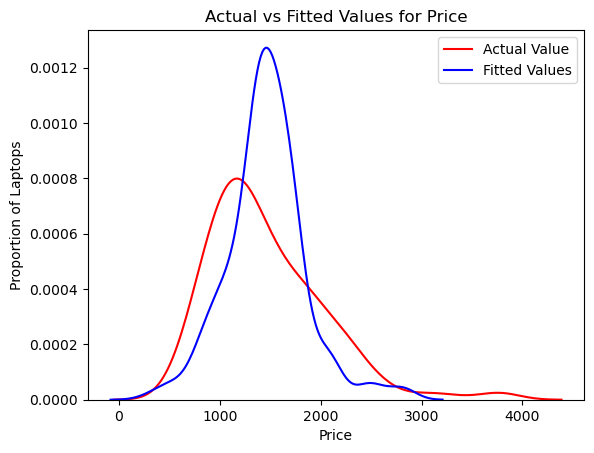

In [48]:
#We will generate the distribution plot for the actual and predicted values
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat_mlm_price, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Laptops')
plt.legend(['Actual Value','Fitted Values'])
plt.show()

<details>
    <summary>Click here for Solution</summary>

```python
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')

```

</details>


Find the R^2 score and the MSE value for this fit. Is this better or worst than the performance of Single Linear Regression?


In [50]:
#As we can see in the plot, the values predicted closely match the actual values
#but there is still room for improvement

#We will calculate the R^2 value for the multiple linear regression model
r_score_mlm = mlm.score(Z, df['Price'])
mse_mlm = mean_squared_error(df['Price'], Yhat_mlm_price)

print('The R-square for the current MLM is: ', r_score_mlm)
print('The MSE for the current MLM is: ', mse_mlm)

The R-square for the current MLM is:  0.4608429105735675
The MSE for the current MLM is:  177267.691875997


For the previous values from the SLR model, we had:
The R-square:  0.1344436321024326 and the MSE:  284583.4405868629

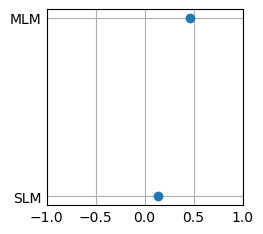

In [62]:
plt.style.use('_mpl-gallery')
fig, ax = plt.subplots()
ax.scatter([r_score_lm_cpu_freq, r_score_mlm], ['SLM', 'MLM'])
ax.set(xlim=(-1, 1))
plt.show()

<details>
    <summary>Click here for Solution</summary>

```python
ax2 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax2)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
```

</details>


# Task 3 - Polynomial Regression
Use the variable "CPU_frequency" to create Polynomial features. Try this for 3 different values of polynomial degrees. Remember that polynomial fits are done using `numpy.polyfit`. 


In [66]:
#Now, using polynomial regression, we will use 'CPU_frequency' to predict the price of a laptop
#using 3 different polynomial degrees

#Previously we defined X as the 'CPU_frequency' feature, but we need 1-D vector
X_flat = X.to_numpy().flatten()
#and Y as the 'Price' feature

f1 = np.polyfit(X_flat, Y, 1)
p1 = np.poly1d(f1)
print(f'The first degree polynomial function is: \n{p1}')

f3 = np.polyfit(X_flat, Y, 3)
p3 = np.poly1d(f3)
print(f'The third degree polynomial function is: \n{p3}')

f5 = np.polyfit(X_flat, Y, 5)
p5 = np.poly1d(f5)
print(f'The fifth degree polynomial function is: \n{p5}')

The first degree polynomial function is: 
 
1485 x + 253.7
The third degree polynomial function is: 
           3             2
3.409e+04 x - 6.574e+04 x + 4.129e+04 x - 7238
The fifth degree polynomial function is: 
           5            4             3             2
1.357e+06 x - 4.72e+06 x + 6.458e+06 x - 4.336e+06 x + 1.425e+06 x - 1.818e+05


Where $X$ = CPU_frequency and $Y \text{(the result)}$ = Price

<details>
    <summary>Click here for Solution</summary>

```python
X = X.to_numpy().flatten()
f1 = np.polyfit(X, Y, 1)
p1 = np.poly1d(f1)

f3 = np.polyfit(X, Y, 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X, Y, 5)
p5 = np.poly1d(f5)
```

</details>


Plot the regression output against the actual data points to note how the data fits in each case. To plot the polynomial response over the actual data points, you have the function shown below.


In [67]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

Call this function for the 3 models created and get the required graphs.


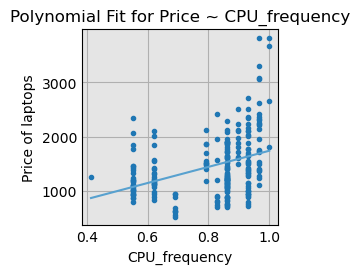

In [68]:
#Call for function of degree 1
PlotPolly(p1, X_flat, Y, 'CPU_frequency')

<details>
    <summary>Click here for Solution</summary>
    
```python
PlotPolly(p1, X, Y, 'CPU_frequency')
```

</details>


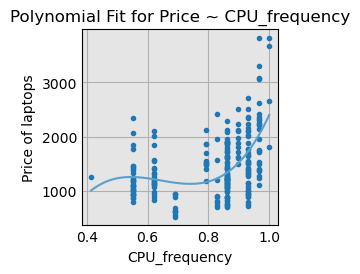

In [69]:
# Call for function of degree 3
PlotPolly(p3, X_flat, Y, 'CPU_frequency')

<details>
    <summary>Click here for Solution</summary>
    
```python
PlotPolly(p3, X, Y, 'CPU_frequency')
```

</details>


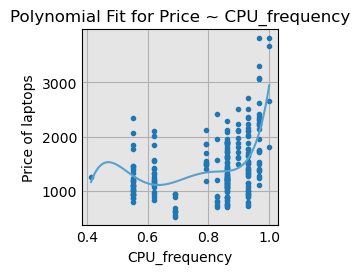

In [70]:
# Call for function of degree 5
PlotPolly(p5, X_flat, Y, 'CPU_frequency')

<details>
    <summary>Click here for Solution</summary>
    
```python
PlotPolly(p5, X, Y, 'CPU_frequency')
```

</details>


Also, calculate the R^2 and MSE values for these fits. For polynomial functions, the function sklearn.metrics.r2_score will be used to calculate R^2 values.


In [73]:
#We will calculate the R^2 value for each polynomial degree and store it in a variable
r_score_p1 = r2_score(Y, p1(X_flat))
r_score_p3 = r2_score(Y, p3(X_flat))
r_score_p5 = r2_score(Y, p5(X_flat))

#Also the MSE
mse_p1 = mean_squared_error(Y, p1(X_flat))
mse_p3 = mean_squared_error(Y, p3(X_flat))
mse_p5 = mean_squared_error(Y, p5(X_flat))

#And print the values
for i in range(1,6,2):
    print(f'The R-square for the current polynomial degree {i} is: ', eval(f'r_score_p{i}'))
    print(f'The MSE for the current polynomial degree {i} is: ', eval(f'mse_p{i}'))
    print('\n')

The R-square for the current polynomial degree 1 is:  0.1344436321024326
The MSE for the current polynomial degree 1 is:  284583.4405868629


The R-square for the current polynomial degree 3 is:  0.26692640796531064
The MSE for the current polynomial degree 3 is:  241024.86303848785


The R-square for the current polynomial degree 5 is:  0.30308227064438853
The MSE for the current polynomial degree 5 is:  229137.29548053557




/Users/pedro_rgz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/pedro_rgz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


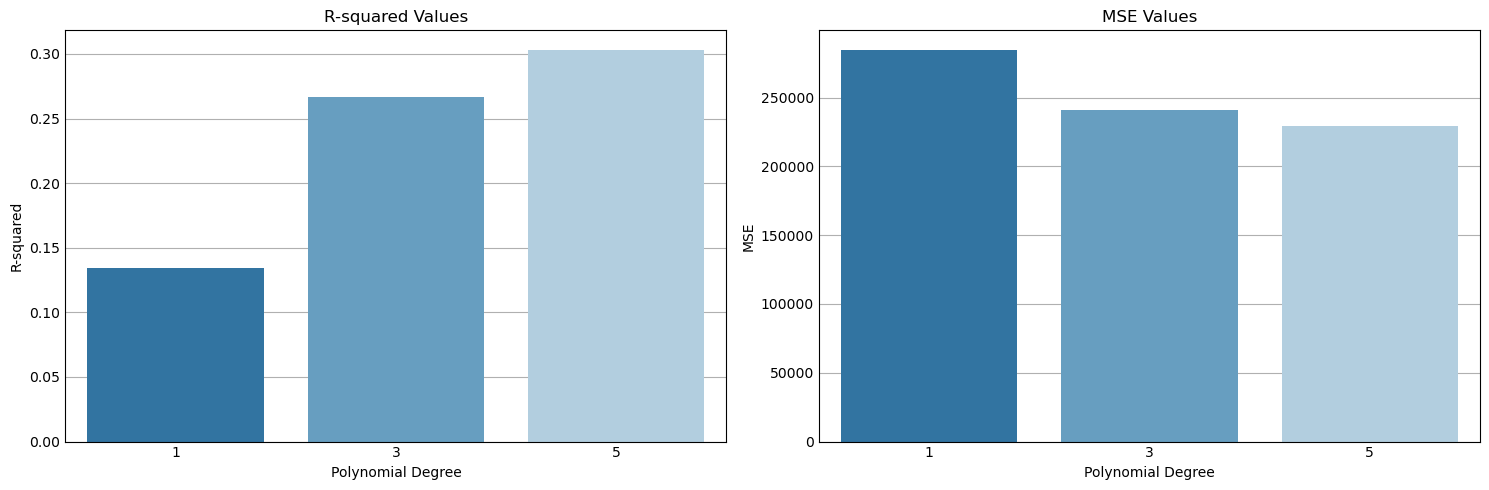

In [76]:
# Create a list of R-squared values and MSE values
r_squared_values = [r_score_p1, r_score_p3, r_score_p5]
mse_values = [mse_p1, mse_p3, mse_p5]

# Create a list of polynomial degrees
degrees = [1, 3, 5]

# Plot R-squared values
plt.subplot(1, 2, 1)
sns.barplot(x=degrees, y=r_squared_values)
plt.title('R-squared Values')
plt.xlabel('Polynomial Degree')
plt.ylabel('R-squared')

#Set height and width of the figure
plt.rcParams['figure.figsize'] = [30, 15]

# Plot MSE values
plt.subplot(1, 2, 2)
sns.barplot(x=degrees, y=mse_values)
plt.title('MSE Values')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()


<details>
    <summary>Click here for Solution</summary>
    
```python
r_squared_1 = r2_score(Y, p1(X))
print('The R-square value for 1st degree polynomial is: ', r_squared_1)
print('The MSE value for 1st degree polynomial is: ', mean_squared_error(Y,p1(X)))
r_squared_3 = r2_score(Y, p3(X))
print('The R-square value for 3rd degree polynomial is: ', r_squared_3)
print('The MSE value for 3rd degree polynomial is: ', mean_squared_error(Y,p3(X)))
r_squared_5 = r2_score(Y, p5(X))
print('The R-square value for 5th degree polynomial is: ', r_squared_5)
print('The MSE value for 5th degree polynomial is: ', mean_squared_error(Y,p5(X)))
```

</details>


# Task 4 - Pipeline
Create a pipeline that performs parameter scaling, Polynomial Feature generation and Linear regression. Use the set of multiple features as before to create this pipeline. 


In [ ]:
#  Write your code below and press Shift+Enter to execute


<details>
    <summary>Click here for Solution</summary>
    
```python
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
```

</details>


Evaluate the MSE and R^2 values for the this predicted output.


In [ ]:
#  Write your code below and press Shift+Enter to execute


<details>
    <summary>Click here for Solution</summary>
    
```python
print('MSE for multi-variable polynomial pipeline is: ', mean_squared_error(Y, ypipe))
print('R^2 for multi-variable polynomial pipeline is: ', r2_score(Y, ypipe))

```

</details>


You should now have seen that the values of R^2 increase as we go from Single Linear Regression to Multiple Linear Regression. Further, if we go for multiple linear regression extended with polynomial features, we get an even better R^2 value.


# Congratulations! You have completed the lab


## Authors


[Abhishek Gagneja](https://www.coursera.org/instructor/~129186572)

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-16|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-19|0.2|Vicky Kuo|Reviewed and Revised|


Copyright © 2023 IBM Corporation. All rights reserved.
